<a href="https://colab.research.google.com/github/Manikandan0925/Project---E-commerce-Customer-Segmentation/blob/main/E_commerce_Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1. Import Packages**


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**2. Read the Data**

In [2]:
raw_data= pd.read_excel("/content/cust_data (1).xlsx",index_col=0)

raw_data.head()


,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
Cust_ID,,,,,,,,,,,,,,,,,,,,,
1,M,7,0,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0
2,F,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,M,7,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,F,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,NaN,10,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1


**3. Understand and Prepare the Data**

Data Types and Dimensions

In [3]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 37 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  27276 non-null  object
 1   Orders                  30000 non-null  int64 
 2   Jordan                  30000 non-null  int64 
 3   Gatorade                30000 non-null  int64 
 4   Samsung                 30000 non-null  int64 
 5   Asus                    30000 non-null  int64 
 6   Udis                    30000 non-null  int64 
 7   Mondelez International  30000 non-null  int64 
 8   Wrangler                30000 non-null  int64 
 9   Vans                    30000 non-null  int64 
 10  Fila                    30000 non-null  int64 
 11  Brooks                  30000 non-null  int64 
 12  H&M                     30000 non-null  int64 
 13  Dairy Queen             30000 non-null  int64 
 14  Fendi                   30000 non-null  int64 
 15  He

In [4]:
raw_data.shape

(30000, 37)

Distribution of Variables

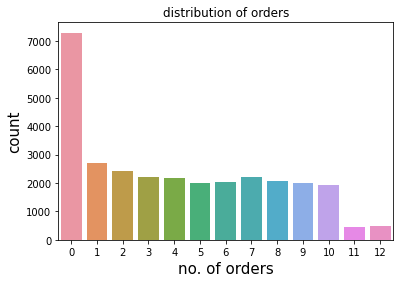

In [5]:
 #Distribution of order placed by customers

sns.countplot(data=raw_data,x='Orders')
plt.title('distribution of orders')
plt.xlabel('no. of orders',fontsize=15)
plt.ylabel('count',fontsize=15)
plt.show()

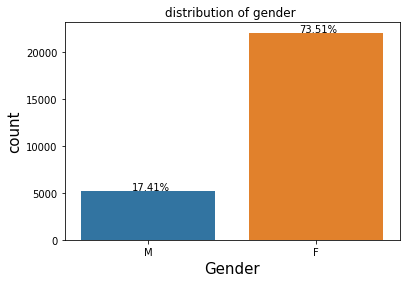

In [6]:
#Distribution of the gender of the customers

sns.countplot(data=raw_data,x='Gender')
plt.title('distribution of gender ')
plt.xlabel('Gender',fontsize=15)
plt.ylabel('count',fontsize=15)
# to showpercent on top of bar
# x and y gives the position of text
# s is the text
plt.text(x=-0.1,y=raw_data.Gender.value_counts()[1]+ 20, s=str(round((raw_data.Gender.value_counts()[1])*100/len(raw_data.Gender),2)) + '%')
plt.text(x=0.9,y=raw_data.Gender.value_counts()[0]+ 20, s=str(round((raw_data.Gender.value_counts()[0])*100/len(raw_data.Gender),2)) + '%')
plt.show()

In [7]:
y=raw_data.Gender.value_counts()
y

F    22054
M     5222
Name: Gender, dtype: int64

Statistical Summary

In [8]:
raw_data.describe()

,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,Fila,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,4.169800,0.267433,0.252333,0.222933,0.161333,0.143533,0.139767,0.106933,0.111433,0.094267,...,0.102533,0.271133,0.370067,0.158967,0.077667,0.057333,0.192200,0.116367,0.088033,0.070900
std,3.590311,0.804778,0.705368,0.917494,0.740038,0.641258,0.525840,0.515921,0.547990,0.531592,...,0.486376,0.714682,0.758465,0.510527,0.383370,0.300082,0.641306,0.446578,0.399277,0.387915
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,12.000000,24.000000,15.000000,27.000000,17.000000,14.000000,31.000000,9.000000,16.000000,15.000000,...,19.000000,12.000000,11.000000,8.000000,9.000000,8.000000,22.000000,14.000000,8.000000,16.000000


Average no of orders placed by customers is 4

In [9]:
raw_data.describe(include='object').T

,count,unique,top,freq
Gender,27276,2,F,22054


Missing Data Treatment

In [10]:
total= raw_data.isnull().sum().sort_values(ascending=False)
percent=(raw_data.isnull().sum()/raw_data.isnull().count()*100).sort_values(ascending=False)
missing_data=pd.concat([total,percent],axis=1,keys=['Total','Percent'])

In [11]:
missing_data

,Total,Percent
Gender,2724,9.08
J.M. Smucker,0,0.00
Juniper,0,0.00
Huawei,0,0.00
Compaq,0,0.00
IBM,0,0.00
Burberry,0,0.00
Mi,0,0.00
LG,0,0.00
Dior,0,0.00


Text(0.5, 1.0, 'heatmap for missing values')

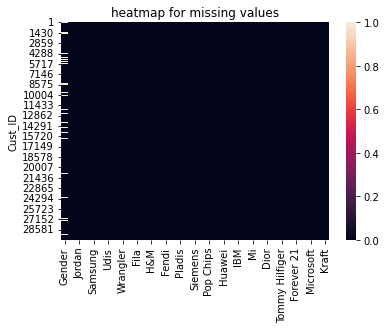

In [12]:
sns.heatmap(raw_data.isnull())
plt.title('heatmap for missing values')

Replace missig values in gender by performing dummy encoding

In [13]:
data=pd.get_dummies(raw_data,columns=["Gender"])

In [14]:
data.head()

,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,Fila,...,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft,Gender_F,Gender_M
Cust_ID,,,,,,,,,,,,,,,,,,,,,
1,7,0,0,0,0,0,0,0,2,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,7,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5,10,0,0,0,0,0,0,0,0,0,...,2,0,0,0,0,0,1,1,0,0


In [15]:
data.shape

(30000, 38)

In [16]:
data.isnull().sum()

Orders                    0
Jordan                    0
Gatorade                  0
Samsung                   0
Asus                      0
Udis                      0
Mondelez International    0
Wrangler                  0
Vans                      0
Fila                      0
Brooks                    0
H&M                       0
Dairy Queen               0
Fendi                     0
Hewlett Packard           0
Pladis                    0
Asics                     0
Siemens                   0
J.M. Smucker              0
Pop Chips                 0
Juniper                   0
Huawei                    0
Compaq                    0
IBM                       0
Burberry                  0
Mi                        0
LG                        0
Dior                      0
Scabal                    0
Tommy Hilfiger            0
Hollister                 0
Forever 21                0
Colavita                  0
Microsoft                 0
Jiffy mix                 0
Kraft               

Visualization

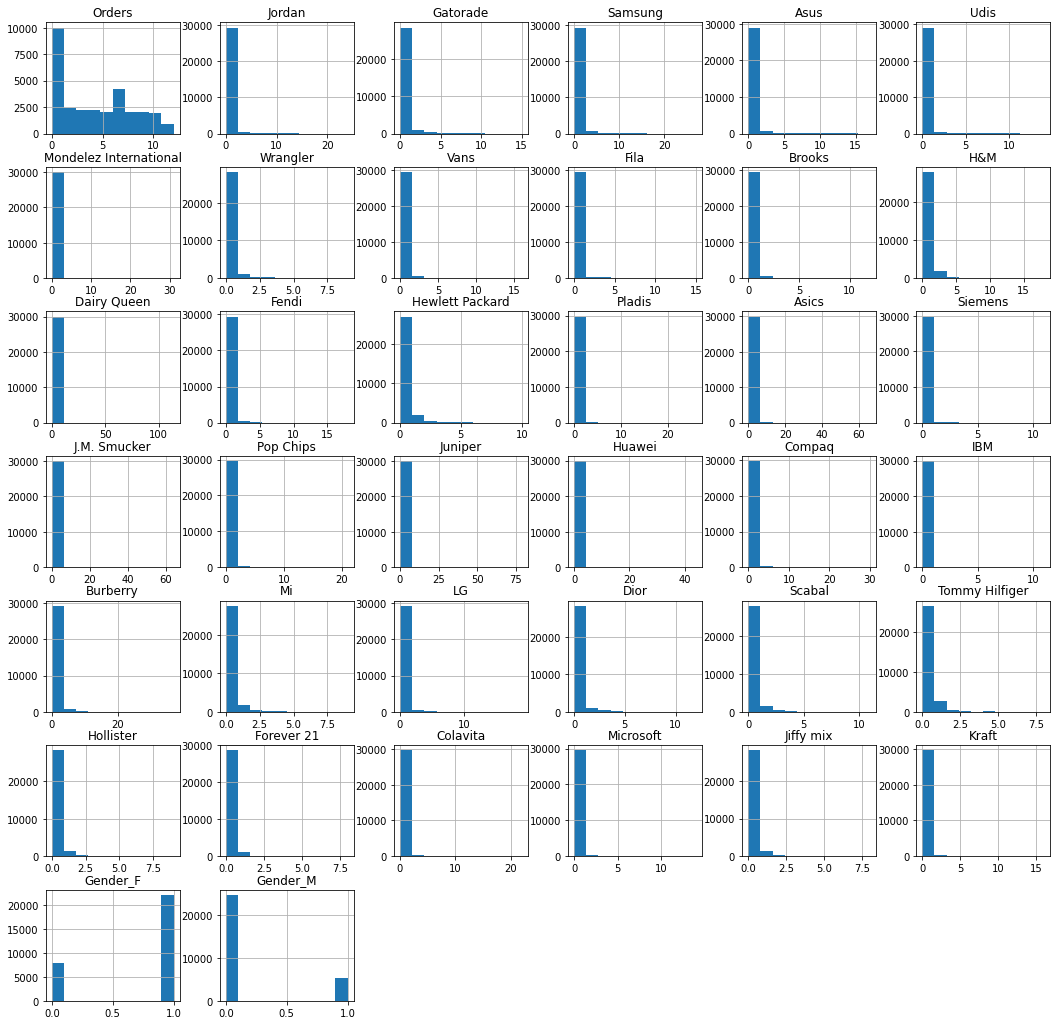

In [17]:
fig=data.hist(figsize=(18,18))

**4. K Means Clustering**

we cosider only the brand names to segment the customers . Thus, drop the variables order and genders  the scale the remaining variables

In [18]:
feature=data.drop(['Orders','Gender_F','Gender_M'],axis=1)
feature.head()

,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,Fila,Brooks,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
Cust_ID,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1


In [19]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler().fit(feature)
feature=scale.transform(feature)

In [20]:
feature_scaled=pd.DataFrame(feature,columns=data.columns[1:36])
feature_scaled.head()

,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,Fila,Brooks,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
0,-0.332312,-0.357739,-0.242985,-0.21801,-0.223835,-0.265801,-0.20727,3.446412,-0.177332,-0.297352,...,-0.210814,-0.379382,-0.487923,-0.311382,-0.202593,-0.191062,-0.299706,-0.260578,-0.220486,-0.182775
1,-0.332312,1.059984,-0.242985,-0.21801,-0.223835,-0.265801,-0.20727,-0.203353,-0.177332,-0.297352,...,-0.210814,1.019864,-0.487923,-0.311382,-0.202593,-0.191062,-0.299706,-0.260578,-0.220486,-0.182775
2,-0.332312,1.059984,-0.242985,-0.21801,-0.223835,-0.265801,-0.20727,-0.203353,-0.177332,-0.297352,...,-0.210814,-0.379382,-0.487923,-0.311382,-0.202593,-0.191062,-0.299706,1.978708,-0.220486,-0.182775
3,-0.332312,-0.357739,-0.242985,-0.21801,-0.223835,-0.265801,-0.20727,-0.203353,-0.177332,-0.297352,...,-0.210814,-0.379382,-0.487923,-0.311382,-0.202593,-0.191062,-0.299706,-0.260578,-0.220486,-0.182775
4,-0.332312,-0.357739,-0.242985,-0.21801,-0.223835,-0.265801,-0.20727,-0.203353,-0.177332,-0.297352,...,-0.210814,-0.379382,2.149024,-0.311382,-0.202593,-0.191062,-0.299706,-0.260578,2.284083,2.395151


**Build a Model with multiple K**

In [21]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


n_clusters=[4,5,6,7,8]


for k in n_clusters:
    cluster=KMeans(n_clusters=k,random_state=10)
    predict=cluster.fit_predict(feature_scaled)
    
    score=silhouette_score(feature_scaled,predict,random_state=10)
    print ("For n_clusters = {}, silhouette score is {})".format(k, score))

For n_clusters = 4, silhouette score is 0.28882936660509584)
For n_clusters = 5, silhouette score is 0.27345077326442396)
For n_clusters = 6, silhouette score is 0.21945733520582925)
For n_clusters = 7, silhouette score is 0.20381188273491607)
For n_clusters = 8, silhouette score is 0.19969011593382976)


In [22]:
# building k means model for k =4
model=KMeans(n_clusters=4,random_state=10)
model.fit(feature_scaled)

KMeans(n_clusters=4, random_state=10)

**5. Retrive the Clusters**

In [23]:
data_output=data.copy(deep=True)
data_output['cluster']=model.labels_
# model.labels_ give the cluster number in which customers belongs

In [24]:
data_output.head()

,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,Fila,...,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft,Gender_F,Gender_M,cluster
Cust_ID,,,,,,,,,,,,,,,,,,,,,
1,7,0,0,0,0,0,0,0,2,0,...,0,0,0,0,0,0,0,0,1,1
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,2
3,7,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
5,10,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0


In [25]:
# check the size of each cluster
np.unique(model.labels_,return_counts=True)

(array([0, 1, 2, 3], dtype=int32), array([ 1255, 22772,  5272,   701]))

Text(2.85, 2000, '701')

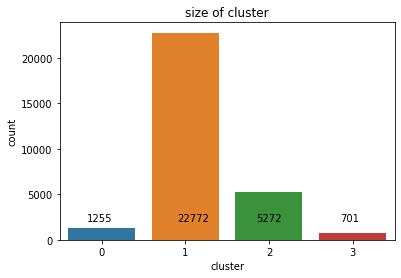

In [26]:
#plot a barplot to visualise the cluster size
sns.countplot(data=data_output,x='cluster')
plt.title('size of cluster')
plt.text(x=-.18,y=2000,s=np.unique(model.labels_,return_counts=True)[1][0])
plt.text(x=.9,y=2000,s=np.unique(model.labels_,return_counts=True)[1][1])
plt.text(x=1.85,y=2000,s=np.unique(model.labels_,return_counts=True)[1][2])
plt.text(x=2.85,y=2000,s=np.unique(model.labels_,return_counts=True)[1][3])

**Cluster Centers**

the cluster center gives informaion about the the variables belonging to the clusters

In [27]:
center=pd.DataFrame(model.cluster_centers_,columns=data_output.columns[1:36])
center.head()

,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,Fila,Brooks,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
0,0.446911,0.464653,0.233811,0.158847,0.102969,0.253960,0.317851,0.385554,0.095476,0.808415,...,1.396351,0.631866,0.290554,1.137030,0.335733,0.417016,1.391345,0.806428,1.575620,1.922702
1,-0.158476,-0.157536,-0.084381,-0.116934,-0.121153,-0.087155,-0.113422,-0.076786,-0.039016,-0.123452,...,-0.088160,-0.161581,-0.191656,-0.142253,-0.148547,-0.141765,-0.076493,-0.068999,-0.079321,-0.082740
2,0.594856,0.569990,0.324250,0.474459,0.511302,0.314878,0.430609,0.257115,0.145073,0.358618,...,0.061868,0.565501,0.770176,0.350728,0.586942,0.535840,0.003689,0.104907,-0.020615,-0.087260
3,-0.116054,0.008321,-0.110823,-0.046447,-0.085908,0.013628,-0.116023,-0.125255,0.007833,-0.127840,...,-0.099359,-0.125881,-0.074137,-0.045926,-0.180266,-0.162539,-0.032771,0.010947,-0.088290,-0.098193


**6. Cluster Analysis**

6.1 Analysis of cluster_1
  1.check the size of cluster
  2.sort the variables belonging to the cluster
  3.commputate the statiscal summury for observation in the cluster







In [28]:
# sort the variables
cluster_1=sorted(zip(list(center.iloc[0,:]),list(center.columns)),reverse=True)[:10]
cluster_1

[(2.5683633928700207, 'Pladis'),
 (2.5566711435400533, 'Burberry'),
 (1.9227024096897427, 'Kraft'),
 (1.9073294208644698, 'Dairy Queen'),
 (1.575619545523192, 'Jiffy mix'),
 (1.3963507697171844, 'LG'),
 (1.3913445112503853, 'Colavita'),
 (1.3864121214217768, 'Pop Chips'),
 (1.207535047336853, 'J.M. Smucker'),
 (1.1370303957637249, 'Tommy Hilfiger')]

check the size of cluster_1

In [29]:
np.unique(model.labels_,return_counts=True)[1][0]

1255

sort the variables

In [30]:
cluster_1_var=pd.DataFrame(cluster_1)[1]
cluster_1_var

0            Pladis
1          Burberry
2             Kraft
3       Dairy Queen
4         Jiffy mix
5                LG
6          Colavita
7         Pop Chips
8      J.M. Smucker
9    Tommy Hilfiger
Name: 1, dtype: object

statistical summary

In [31]:
data_output[['Orders','Gender_F','Gender_M','cluster']][data_output.cluster==0].describe()

,Orders,Gender_F,Gender_M,cluster
count,1255.000000,1255.000000,1255.000000,1255.0
mean,4.146614,0.821514,0.120319,0.0
std,3.630131,0.383074,0.325464,0.0
min,0.000000,0.000000,0.000000,0.0
25%,1.000000,1.000000,0.000000,0.0
50%,4.000000,1.000000,0.000000,0.0
75%,7.000000,1.000000,0.000000,0.0
max,12.000000,1.000000,1.000000,0.0


**Analysis of cluster_2**

In [32]:
cluster_2=sorted(zip(list(center.iloc[1,:]),list(center.columns)),reverse=True)[:10]
cluster_2

[(-0.017300283220996093, 'IBM'),
 (-0.03901645356307062, 'Fila'),
 (-0.055304851992874375, 'Hewlett Packard'),
 (-0.05631154842238818, 'Compaq'),
 (-0.06899225921253258, 'Fendi'),
 (-0.06899895112799385, 'Microsoft'),
 (-0.07649272672741791, 'Colavita'),
 (-0.0767861121872721, 'Vans'),
 (-0.07932113224858964, 'Jiffy mix'),
 (-0.0827404232942301, 'Kraft')]

In [33]:
#1. size
np.unique(model.labels_,return_counts=True)[1][1]

22772

In [34]:
# 2. sort
cluster_2_var=pd.DataFrame(cluster_2)[1]
cluster_2_var

0                IBM
1               Fila
2    Hewlett Packard
3             Compaq
4              Fendi
5          Microsoft
6           Colavita
7               Vans
8          Jiffy mix
9              Kraft
Name: 1, dtype: object

In [35]:
# statistical
data_output[['Orders','Gender_F','Gender_M','cluster']][data_output.cluster==1].describe()

,Orders,Gender_F,Gender_M,cluster
count,22772.000000,22772.000000,22772.000000,22772.0
mean,4.096829,0.705691,0.195547,1.0
std,3.606516,0.455741,0.396630,0.0
min,0.000000,0.000000,0.000000,1.0
25%,0.000000,0.000000,0.000000,1.0
50%,4.000000,1.000000,0.000000,1.0
75%,7.000000,1.000000,0.000000,1.0
max,12.000000,1.000000,1.000000,1.0


3. Analysis of cluster_3

In [36]:
cluster_3=sorted(zip(list(center.iloc[2,:]),list(center.columns)),reverse=True)[:10]
cluster_3

[(0.7701757489709979, 'Scabal'),
 (0.5948559923975795, 'Jordan'),
 (0.5869420849637125, 'Hollister'),
 (0.5699901524200979, 'Gatorade'),
 (0.5655013593708393, 'Dior'),
 (0.5438465382729089, 'H&M'),
 (0.53583978750718, 'Forever 21'),
 (0.5113016084652766, 'Udis'),
 (0.5044601305848015, 'Huawei'),
 (0.4744591715429245, 'Asus')]

In [37]:
#1. size
np.unique(model.labels_,return_counts=True)[1][2]

5272

In [38]:
#2.sort
cluster_3_var=pd.DataFrame(cluster_3)[1]
cluster_3_var

0        Scabal
1        Jordan
2     Hollister
3      Gatorade
4          Dior
5           H&M
6    Forever 21
7          Udis
8        Huawei
9          Asus
Name: 1, dtype: object

In [39]:
#3. satstitical
data_output[['Orders','Gender_F','Gender_M','cluster']][data_output.cluster==2].describe()

,Orders,Gender_F,Gender_M,cluster
count,5272.000000,5272.000000,5272.000000,5272.0
mean,4.459598,0.845220,0.089340,2.0
std,3.503566,0.361729,0.285261,0.0
min,0.000000,0.000000,0.000000,2.0
25%,1.000000,1.000000,0.000000,2.0
50%,4.000000,1.000000,0.000000,2.0
75%,7.000000,1.000000,0.000000,2.0
max,12.000000,1.000000,1.000000,2.0


**4. Analysis of cluster_4**

In [40]:
cluster_4=sorted(zip(list(center.iloc[3,:]),list(center.columns)),reverse=True)[:10]
cluster_4

[(4.612421213336683, 'Siemens'),
 (3.757106120080634, 'Asics'),
 (0.3762419165162781, 'J.M. Smucker'),
 (0.11864320568860025, 'Pop Chips'),
 (0.06776496739127584, 'Juniper'),
 (0.06414297821158868, 'Huawei'),
 (0.041533950099074096, 'Mi'),
 (0.030422522349300617, 'Compaq'),
 (0.01362848793884517, 'Mondelez International'),
 (0.010947162250401665, 'Microsoft')]

In [41]:
#1. size
np.unique(model.labels_,return_counts=True)[1][3]

701

In [42]:
#2.sort
cluster_4_var=pd.DataFrame(cluster_4)[1]
cluster_4_var

0                   Siemens
1                     Asics
2              J.M. Smucker
3                 Pop Chips
4                   Juniper
5                    Huawei
6                        Mi
7                    Compaq
8    Mondelez International
9                 Microsoft
Name: 1, dtype: object

In [43]:
#3. satstitical
data_output[['Orders','Gender_F','Gender_M','cluster']][data_output.cluster==3].describe()

,Orders,Gender_F,Gender_M,cluster
count,701.000000,701.000000,701.000000,701.0
mean,4.402282,0.708987,0.209700,3.0
std,3.522693,0.454554,0.407385,0.0
min,0.000000,0.000000,0.000000,3.0
25%,1.000000,0.000000,0.000000,3.0
50%,4.000000,1.000000,0.000000,3.0
75%,7.000000,1.000000,0.000000,3.0
max,12.000000,1.000000,1.000000,3.0


**Conclusion**

In this case study , we have grouped the customers dataset into 4 clusters based on the brands they have searched on e-commerece sites. we have used the silhouette score method to find the optimum number of clusters and decided k=4 as the best pick after analysing the silhouette score .

After applying the K-means algorithms with an 4 number of clusters , we segmented the customers under 'Grocery','Appearls','Electronics'and 'Basket class' categories. These clusters give the information about the interest of the customer in the different brands. This type of segmentation can help the e-commerce companies , to know the customer choices and they can provide more accurate recommendation to the customers.